In [1]:
import sys

sys.path.append("../")

import torch
import torch.utils as utils

import pytorch_lightning as pl

from torchemlp.groups import SO, O, S, Z
from torchemlp.nn.equivariant import EMLP
from torchemlp.nn.utils import RegressionLightning
from torchemlp.datasets import Inertia

In [2]:
# TRAINING_SET_SIZE = 10000
TRAINING_SET_SIZE = 10_000
BATCH_SIZE = 512

# N_EPOCHS = int(900000 / TRAINING_SET_SIZE)
N_EPOCHS = 100

# DL_WORKERS = 0
DL_WORKERS = 8

N_CHANNELS = 384
N_LAYERS = 3

In [3]:
# dataset = Inertia(TRAINING_SET_SIZE, device='cuda')
dataset = Inertia(TRAINING_SET_SIZE, device="cpu")

G = SO(3)

f"Input type: {dataset.repin(G)}, output type: {dataset.repout(G)}"

'Input type: 5V⁰+5V, output type: V²'

In [4]:
val_size = 250
test_size = 250
train_size = len(dataset) - val_size - test_size

split_data = utils.data.random_split(dataset, [train_size, val_size, test_size])

train_loader = utils.data.DataLoader(
    split_data[0], batch_size=BATCH_SIZE, num_workers=DL_WORKERS, shuffle=True
)
val_loader = utils.data.DataLoader(
    split_data[1], batch_size=BATCH_SIZE, num_workers=DL_WORKERS
)
test_loader = utils.data.DataLoader(
    split_data[2], batch_size=BATCH_SIZE, num_workers=DL_WORKERS
)

In [5]:
# model = EMLP(dataset.repin, dataset.repout, G, N_CHANNELS, N_LAYERS).cuda()
model = EMLP(dataset.repin, dataset.repout, G, N_CHANNELS, N_LAYERS)
plmodel = RegressionLightning(model)

In [6]:
model.repin

5V⁰+5V

In [7]:
trainer = pl.Trainer(
    limit_train_batches=BATCH_SIZE, max_epochs=N_EPOCHS, accelerator="cpu"
)
trainer.fit(plmodel, train_loader, val_loader)
trainer.test(plmodel, test_loader)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/rytse/mambaforge/envs/l2e10/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:176: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
/home/rytse/mambaforge/envs/l2e10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(
Missing logger f

/home/rytse/mambaforge/envs/l2e10/lib/python3.10/site-packages/pytorch_lightning/trainer/trainer.py:1609: PossibleUserWarning: The number of training batches (19) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 0:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 19/20 [00:37<00:01,  2.00s/it, loss=23.1, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 1:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 19/20 [00:38<00:02,  2.03s/it, loss=10.8, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 2:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 19/20 [00:38<00:02,  2.02s/it, loss=9.63, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 3:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 19/20 [00:37<00:01,  1.98s/it, loss=9.45, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 4:  95%|██████

`Trainer.fit` stopped: `max_epochs=100` reached.


Testing DataLoader 0: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.94it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.20723757147789001    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.20723757147789001}]

In [13]:
dataset.X.shape, dataset.Y.shape

(torch.Size([10000, 20]), torch.Size([10000, 9]))

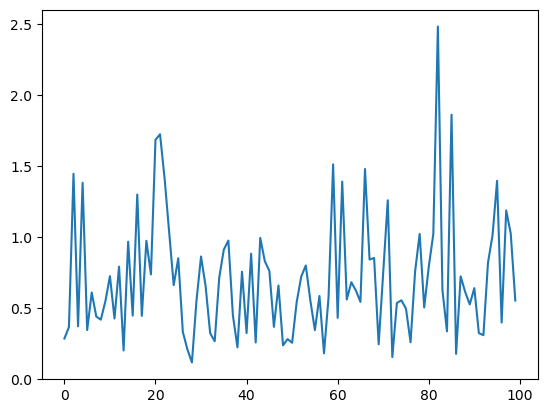

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

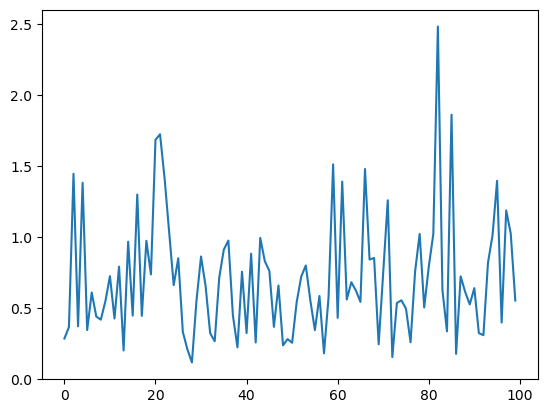

In [15]:
import matplotlib.pyplot as plt

plt.plot(dataset.X[:100, 0])
plt.show(dataset.Y[:100, 0])
plt.show()